In [1]:
# 6.1.4 Create Latitude and Longitude Combinations

In [31]:
# Import the dependencies. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [32]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [33]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [34]:
# Use the print () function to display the latitude and longitude combinations. 
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-52.2612177220469 -130.13487698688738
-10.190064151547702 -37.723347559138034
72.72165121505611 29.458897939476998
58.58776174840915 161.07109636274276
-3.6269271033412878 -44.87181687267622
81.32345791547903 8.490160615766882
-39.4515654357801 -167.01332670200298
11.87931374588733 65.02867631591323
-45.41309746208003 -59.66315230846506
-1.8757782360540318 76.34569238458164
-62.33847111389883 -65.12682692242745
49.045725380797364 170.02899899850013
60.34700527198831 87.03227178225814
19.005417687214646 21.737667585310305
47.37819655612307 -168.00802017597118
24.21819493192821 37.275956690349204
-50.69447828715174 -137.86039525957003
-8.736046444048043 171.09283196958592
40.28019952110358 -25.554841673595433
38.35528569952359 51.033725726013444
-74.70527250164892 -55.03334707064609
16.979872190577083 22.29050537814004
3.566682758123079 153.99762234231554
-42.191515943369794 98.69167511052353
-9.02667804242391 -123.70034007407641
54.783090532110236 -62.15374884547117
46.70329616352214 -1

-46.975199248169694 144.83587508292038
-20.212385962965868 116.67530943757072
-72.88128847756323 -76.09629277677402
-31.937580480132333 85.30310428765233
81.01280213831751 -112.46195022169887
59.078972563461434 58.76691909433589
7.453252270436224 -88.47428713520641
-67.90016054935978 -69.53984997781374
21.983149710592656 130.94937310591826
88.50710044400557 130.8486456455151
-47.11908177355356 -119.49595758703924
-73.76579466809625 19.719937043120666
-7.137331085546279 -120.52359880353292
30.976022178387737 9.905351671114744
-8.10738918052067 175.01469981473622
30.076638508928326 -54.498917999632226
-45.22485184133406 -124.16739584116678
-74.3279705514905 -92.27880676796073
-53.93439382809633 -26.296480531359236
-84.91405452038464 109.59693332365595
-40.59719983063829 34.207599607645136
88.98415701669859 -51.34873229241671
-42.245744371229335 -57.349553468307434
2.5090509434744632 43.291987214650334
6.017904260725103 -89.88699311084773
-73.65778815617223 -25.44195033088542
61.657269065

-25.374549086743798 -169.03854944903483
-9.487681834300261 19.8227540456368
-64.67652828097245 97.61084619882706
43.194624900866984 66.43428811014488
4.6600280557776586 -155.96887966972525
-31.954028958714254 -107.9115162838453
73.4164425383708 148.4480893552041
-40.93564728512255 -0.998615700230431
47.53331281387179 -6.714572667173428
-76.33255823247254 -38.912538824268836
-28.92120980790719 -59.7078706230711
-42.0640896813927 13.925703493083489
-64.78829359631122 83.91828921663779
-55.0880051078267 179.05523366201533
-15.08669788832394 54.909619525176595
76.53915297639892 -107.2059348148114
-19.01953452017942 -68.28826612670264
-75.46216912128192 -107.11322645134591
54.77211139890284 118.4311917326607
-47.6735285918738 1.3778730970653612
-40.362161766527066 -119.22706497227726
32.74875951338757 -77.60923126890854
-85.35987682374645 -132.89591205227035
74.73871340750514 -169.9095859944317
-25.071308899660693 -145.2490366770612
0.3147306580574991 27.46840101904843
-29.690749832796115 1

In [35]:
# 6.1.5 Generate Random World Cities

In [36]:
from citipy import citipy
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [37]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [38]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


591

In [39]:
# 6.2.6 Get the City Weather Data

In [41]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | carira
Processing Record 3 of Set 1 | berlevag
Processing Record 4 of Set 1 | palana
Processing Record 5 of Set 1 | vitoria do mearim
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | kavaratti
Processing Record 9 of Set 1 | viedma
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | belyy yar
Processing Record 14 of Set 1 | faya
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | umm lajj
Processing Record 17 of Set 1 | lata
Processing Record 18 of Set 1 | praia da vitoria
Processing Record 19 of Set 1 | rudsar
Processing Record 20 of Set 1 | biltine
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | busselton
Processing Record

Processing Record 39 of Set 4 | stokmarknes
Processing Record 40 of Set 4 | namibe
Processing Record 41 of Set 4 | evensk
Processing Record 42 of Set 4 | saldanha
Processing Record 43 of Set 4 | haibowan
City not found. Skipping...
Processing Record 44 of Set 4 | slave lake
Processing Record 45 of Set 4 | anadyr
Processing Record 46 of Set 4 | bahua
Processing Record 47 of Set 4 | kloulklubed
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | ust-kut
Processing Record 50 of Set 4 | camabatela
Processing Record 1 of Set 5 | pochutla
Processing Record 2 of Set 5 | henties bay
Processing Record 3 of Set 5 | flinders
Processing Record 4 of Set 5 | benghazi
Processing Record 5 of Set 5 | bairiki
Processing Record 6 of Set 5 | eucaliptus
Processing Record 7 of Set 5 | san quintin
Processing Record 8 of Set 5 | tanda
Processing Record 9 of Set 5 | mount gambier
Processing Record 10 of Set 5 | tierranueva
Processing Record 11 of Set 5 | manaure
Processing Record 12 of Set 5 

Processing Record 29 of Set 8 | rudnogorsk
Processing Record 30 of Set 8 | tabou
Processing Record 31 of Set 8 | deputatskiy
Processing Record 32 of Set 8 | karaul
City not found. Skipping...
Processing Record 33 of Set 8 | pisco
Processing Record 34 of Set 8 | suntar
Processing Record 35 of Set 8 | urumqi
Processing Record 36 of Set 8 | hirado
Processing Record 37 of Set 8 | khani
Processing Record 38 of Set 8 | strelka
Processing Record 39 of Set 8 | buon me thuot
City not found. Skipping...
Processing Record 40 of Set 8 | nabire
Processing Record 41 of Set 8 | xianshuigu
Processing Record 42 of Set 8 | cedral
Processing Record 43 of Set 8 | salinas
Processing Record 44 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 45 of Set 8 | miracema do tocantins
Processing Record 46 of Set 8 | shimoda
Processing Record 47 of Set 8 | bystryy istok
Processing Record 48 of Set 8 | clyde
Processing Record 49 of Set 8 | ozgon
City not found. Skipping...
Processing Record 50 of S

Processing Record 12 of Set 12 | butembo
Processing Record 13 of Set 12 | oranjemund
Processing Record 14 of Set 12 | taree
Processing Record 15 of Set 12 | taybad
Processing Record 16 of Set 12 | wuwei
Processing Record 17 of Set 12 | adre
Processing Record 18 of Set 12 | portland
Processing Record 19 of Set 12 | anjiang
Processing Record 20 of Set 12 | hvammstangi
City not found. Skipping...
Processing Record 21 of Set 12 | kingaroy
Processing Record 22 of Set 12 | trelew
Processing Record 23 of Set 12 | concord
Processing Record 24 of Set 12 | caucaia
Processing Record 25 of Set 12 | bowen
Processing Record 26 of Set 12 | kalevala
Processing Record 27 of Set 12 | asayita
City not found. Skipping...
Processing Record 28 of Set 12 | quelimane
Processing Record 29 of Set 12 | blagoyevo
Processing Record 30 of Set 12 | kissidougou
Processing Record 31 of Set 12 | lakatoro
Processing Record 32 of Set 12 | oranjestad
Processing Record 33 of Set 12 | nouadhibou
Processing Record 34 of Set 

In [42]:
len(city_data)

543

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.61,74,73,12.68,PF,2022-07-26 01:10:53
1,Carira,-10.3608,-37.7011,64.00,95,78,5.17,BR,2022-07-26 01:09:10
2,Berlevag,70.8578,29.0864,55.40,87,100,4.61,NO,2022-07-26 01:10:54
3,Palana,59.1167,159.9667,53.01,66,10,8.01,RU,2022-07-26 01:10:54
4,Vitoria Do Mearim,-3.4622,-44.8706,76.73,74,99,2.57,BR,2022-07-26 01:10:54
5,Avarua,-21.2078,-159.7750,71.65,64,40,5.75,CK,2022-07-26 01:10:55
6,Kavaratti,10.5669,72.6420,81.45,74,43,16.51,IN,2022-07-26 01:10:55
7,Viedma,-40.8135,-62.9967,47.62,94,100,7.49,AR,2022-07-26 01:10:55
8,Hithadhoo,-0.6000,73.0833,82.65,75,41,12.39,MV,2022-07-26 01:10:55
9,Ushuaia,-54.8000,-68.3000,35.26,75,40,23.02,AR,2022-07-26 01:10:56


In [44]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-07-26 01:10:53,-23.1203,-134.9692,75.61,74,73,12.68
1,Carira,BR,2022-07-26 01:09:10,-10.3608,-37.7011,64.00,95,78,5.17
2,Berlevag,NO,2022-07-26 01:10:54,70.8578,29.0864,55.40,87,100,4.61
3,Palana,RU,2022-07-26 01:10:54,59.1167,159.9667,53.01,66,10,8.01
4,Vitoria Do Mearim,BR,2022-07-26 01:10:54,-3.4622,-44.8706,76.73,74,99,2.57
5,Avarua,CK,2022-07-26 01:10:55,-21.2078,-159.7750,71.65,64,40,5.75
6,Kavaratti,IN,2022-07-26 01:10:55,10.5669,72.6420,81.45,74,43,16.51
7,Viedma,AR,2022-07-26 01:10:55,-40.8135,-62.9967,47.62,94,100,7.49
8,Hithadhoo,MV,2022-07-26 01:10:55,-0.6000,73.0833,82.65,75,41,12.39
9,Ushuaia,AR,2022-07-26 01:10:56,-54.8000,-68.3000,35.26,75,40,23.02


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV. 
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
# 6.3.2 Plot Latitude vs. Temperature

In [47]:
# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

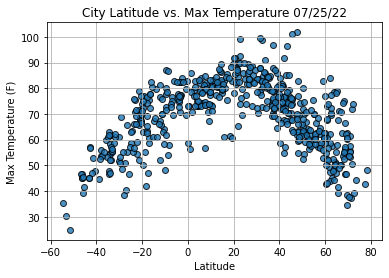

In [48]:
# Import the time module.
import time

#Build the scatter plot for latitude vs. max temperature. 
plt.scatter(lats, 
           max_temps, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties. 
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig1.png")

# Show plot. 
plt.show()

In [49]:
# 6.3.2 Plot Latitude vs. Humidity

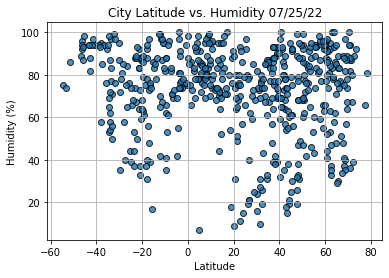

In [50]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [51]:
# 6.3.3 Plot Latitude vs. Cloudiness

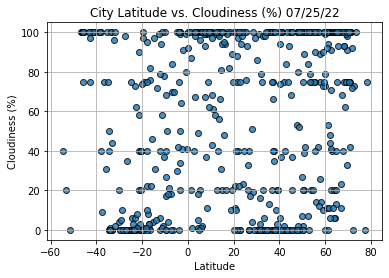

In [52]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [53]:
# 6.3.4 Plot Latitude vs. Wind Speed

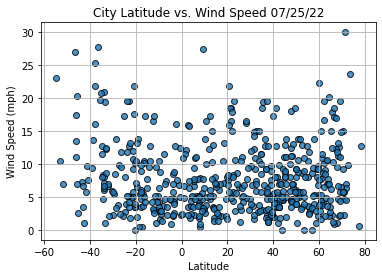

In [54]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [55]:
# 6.4.1 Use Linear Regression to Find the Relationship Between Variables

In [56]:
from scipy.stats import linregress
import matplotlib.pyplot as plt 

In [57]:
temps = [18.2, 29.5, 35.9, 50.1, 58.6, 69.9, 82.1, 85.5, 73.5, 55.2, 40.3, 30.1]
daylight = [7.6, 9.2, 12.2, 13.4, 13.9, 14.2, 13.5, 11.8, 10.9, 9.9, 8.4, 7.8]

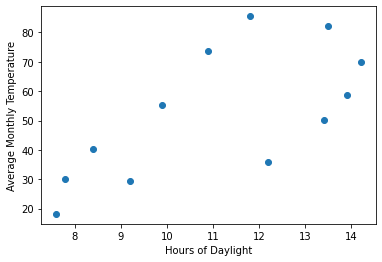

In [58]:
plt.scatter(daylight,temps)
plt.xlabel('Hours of Daylight')
plt.ylabel('Average Monthly Temperature')
plt.show()

In [59]:
linregress(daylight,temps)

LinregressResult(slope=6.15635146103896, intercept=-15.721956168831184, rvalue=0.679679805857105, pvalue=0.015035320128994748, stderr=2.100992241520654, intercept_stderr=23.765061177039463)

In [60]:
(slope, intercept, rval, pval, stderr) = linregress(daylight,temps)

In [61]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 6.16x + -15.72


In [62]:
regress_values = [(day + slope + intercept) for day in daylight]

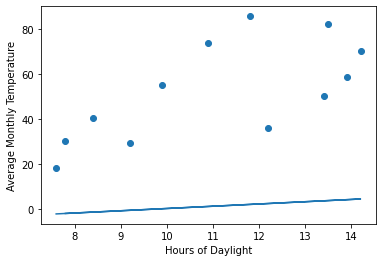

In [63]:
plt.scatter(daylight, temps)
plt.plot(daylight, regress_values)
plt.xlabel('Hours of Daylight')
plt.ylabel('Average Monthly Temperature')
plt.show()

In [64]:
# 6.4.2 Fine the Correlation Between Latitude & Maximum Temperature

In [69]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [67]:
index13 = city_data_df.loc[13]
index13

City                       Bethel
Country                        US
Date          2022-07-26 01:10:57
Lat                       41.3712
Lng                       -73.414
Max Temp                    80.69
Humidity                       86
Cloudiness                      0
Wind Speed                   3.44
Name: 13, dtype: object

In [70]:
city_data_df["Lat"] >= 0.

0      False
1      False
2       True
3       True
4      False
       ...  
538     True
539     True
540     True
541    False
542     True
Name: Lat, Length: 543, dtype: bool

In [71]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Berlevag,NO,2022-07-26 01:10:54,70.8578,29.0864,55.40,87,100,4.61
3,Palana,RU,2022-07-26 01:10:54,59.1167,159.9667,53.01,66,10,8.01
6,Kavaratti,IN,2022-07-26 01:10:55,10.5669,72.6420,81.45,74,43,16.51
10,Nikolskoye,RU,2022-07-26 01:10:56,59.7035,30.7861,60.87,92,73,2.08
11,Belyy Yar,RU,2022-07-26 01:10:56,53.6039,91.3903,58.86,88,75,0.00


In [72]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [74]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Berlevag,NO,2022-07-26 01:10:54,70.8578,29.0864,55.40,87,100,4.61
3,Palana,RU,2022-07-26 01:10:54,59.1167,159.9667,53.01,66,10,8.01
6,Kavaratti,IN,2022-07-26 01:10:55,10.5669,72.6420,81.45,74,43,16.51
10,Nikolskoye,RU,2022-07-26 01:10:56,59.7035,30.7861,60.87,92,73,2.08
11,Belyy Yar,RU,2022-07-26 01:10:56,53.6039,91.3903,58.86,88,75,0.00


In [75]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-07-26 01:10:53,-23.1203,-134.9692,75.61,74,73,12.68
1,Carira,BR,2022-07-26 01:09:10,-10.3608,-37.7011,64.00,95,78,5.17
4,Vitoria Do Mearim,BR,2022-07-26 01:10:54,-3.4622,-44.8706,76.73,74,99,2.57
5,Avarua,CK,2022-07-26 01:10:55,-21.2078,-159.7750,71.65,64,40,5.75
7,Viedma,AR,2022-07-26 01:10:55,-40.8135,-62.9967,47.62,94,100,7.49


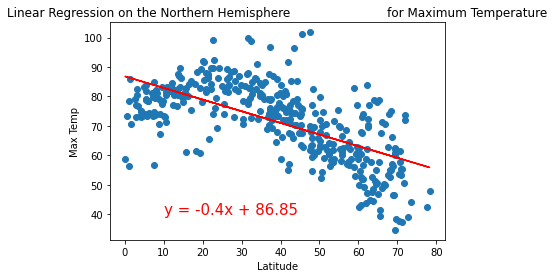

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

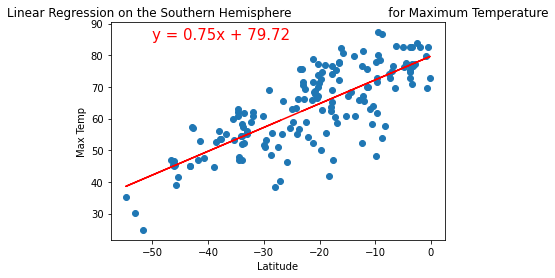

In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

In [78]:
# 6.4.3 Find the Correlation Between Latitude and Percent Humidity 

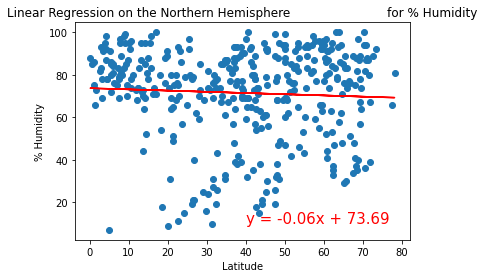

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

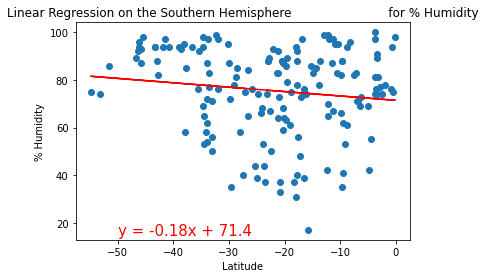

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [81]:
# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

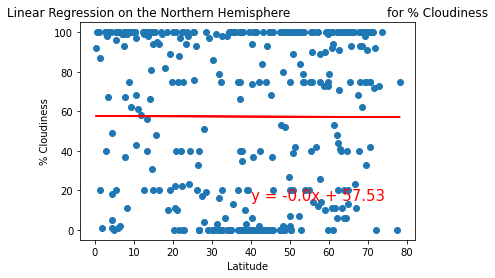

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40, 15))

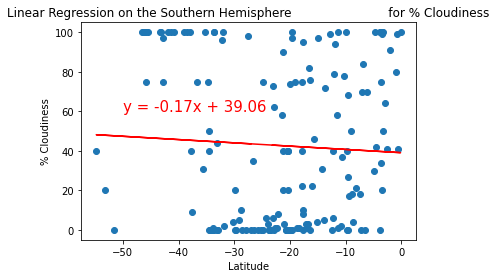

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


In [88]:
# 6.4.5 Find the Correlation Between Latitude and Wind Speed 

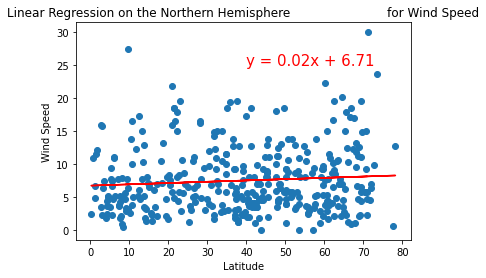

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

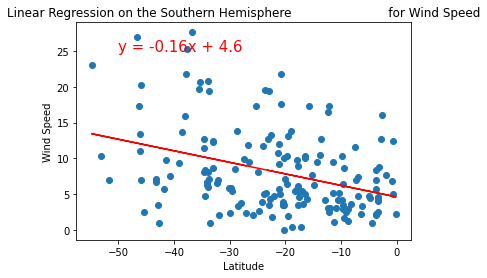

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))